In [2]:
import sklearn as sk

In [3]:
sk.__version__

'0.23.2'

In [4]:
from platform import python_version

In [5]:
print(python_version())

3.7.4


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')



In [8]:
#loading the clean data

In [9]:
data = pd.read_csv('clean_data.csv')

In [10]:
data.head()

,age,brush,tfb,bth,smoke in a day,drink alcohol,coffee,sweet,fastfood,binge eating,soft drinks-soda,open packets,chewing pen,nail biting,grinding teeth,betel leaf-nut,toothpick,chocolate,diabetes,target
0,21,4,2,0,3,0,1,0,1,1,1.0,0,0,0,0,1,1,1,0,0
1,22,4,1,0,4,1,1,1,1,0,2.0,1,0,1,0,0,0,1,0,0
2,23,4,2,1,2,1,1,0,1,1,3.0,1,0,1,0,0,1,1,1,1
3,23,4,2,1,4,1,1,0,1,1,1.0,0,0,1,0,0,0,1,0,1
4,19,4,1,1,6,1,0,0,1,1,3.0,0,0,0,1,0,1,0,0,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1012 non-null   int64  
 1   brush             1012 non-null   int64  
 2   tfb               1012 non-null   int64  
 3   bth               1012 non-null   int64  
 4   smoke in a day    1012 non-null   int64  
 5   drink alcohol     1012 non-null   int64  
 6   coffee            1012 non-null   int64  
 7   sweet             1012 non-null   int64  
 8   fastfood          1012 non-null   int64  
 9   binge eating      1012 non-null   int64  
 10  soft drinks-soda  1012 non-null   float64
 11  open packets      1012 non-null   int64  
 12  chewing pen       1012 non-null   int64  
 13  nail biting       1012 non-null   int64  
 14  grinding teeth    1012 non-null   int64  
 15  betel leaf-nut    1012 non-null   int64  
 16  toothpick         1012 non-null   int64  


In [12]:
data.describe()

,age,brush,tfb,bth,smoke in a day,drink alcohol,coffee,sweet,fastfood,binge eating,soft drinks-soda,open packets,chewing pen,nail biting,grinding teeth,betel leaf-nut,toothpick,chocolate,diabetes,target
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.00000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,28.868577,3.805336,1.264822,0.294466,3.409091,0.389328,0.798419,0.544466,0.652174,0.311265,1.923913,0.753953,0.243083,0.55336,0.175889,0.534585,0.218379,0.751976,0.148221,0.600791
std,9.704615,0.744682,0.556437,0.456028,2.645309,0.487839,0.401379,0.498265,0.476516,0.463240,0.830395,0.430919,0.429157,0.49739,0.380914,0.499049,0.413351,0.432079,0.355495,0.489978
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,24.000000,4.000000,1.000000,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,38.000000,4.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,90.000000,4.000000,3.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# From the describe() method we can see possible outlier in ['age'] column 

#### Outliers

In [14]:
data['age'].max()

90

In [15]:
data['age'].min()

2

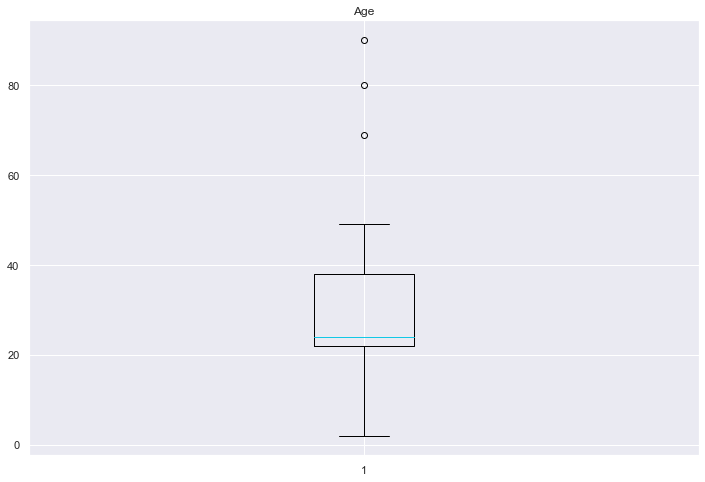

In [16]:
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Age')
ax1.boxplot(data['age'])
plt.show()

In [17]:
data['age'][data['age'] > 60] 

218    69
831    90
894    80
Name: age, dtype: int64

In [18]:
data['age'][data['age']<10]

227    4
842    2
Name: age, dtype: int64

In [19]:
#median age 
int(np.median(data['age']))

24

In [20]:
data['age'][data['age']>60] = 24

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
data['age'][data['age']<10] = 24

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


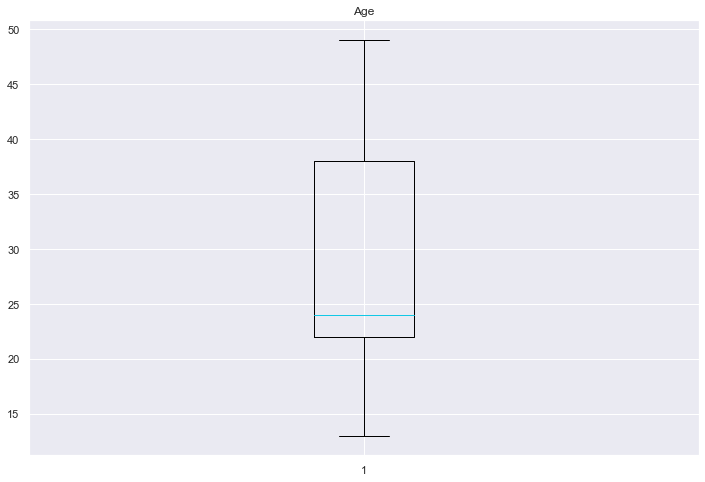

In [22]:
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Age')
ax1.boxplot(data['age'])
plt.show()

In [23]:
data.describe()

,age,brush,tfb,bth,smoke in a day,drink alcohol,coffee,sweet,fastfood,binge eating,soft drinks-soda,open packets,chewing pen,nail biting,grinding teeth,betel leaf-nut,toothpick,chocolate,diabetes,target
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.00000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,28.745059,3.805336,1.264822,0.294466,3.409091,0.389328,0.798419,0.544466,0.652174,0.311265,1.923913,0.753953,0.243083,0.55336,0.175889,0.534585,0.218379,0.751976,0.148221,0.600791
std,9.223901,0.744682,0.556437,0.456028,2.645309,0.487839,0.401379,0.498265,0.476516,0.463240,0.830395,0.430919,0.429157,0.49739,0.380914,0.499049,0.413351,0.432079,0.355495,0.489978
min,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,24.000000,4.000000,1.000000,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,38.000000,4.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,49.000000,4.000000,3.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
data.shape

(1012, 20)


### Applying Machine Learning Algorithm using Sci-Kit learn choosing estimator
* https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

#### Modle to use
* Linear SVC
* KNeighbors Classifier
* RandomForestClassifier
* Logistic Regression

In [25]:
# Separating Feature and Target/label 

In [26]:
featured_x = data.drop('target',axis=1)
target_y = data['target']

In [27]:
featured_x.shape, target_y.shape

((1012, 19), (1012,))

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
np.random.seed(4)

x_train,x_test,y_train,y_test = train_test_split(featured_x,target_y,test_size=0.2,shuffle=True)


#### Linear SVC

In [30]:

from sklearn import svm


#clf
svc_clf = svm.SVC(random_state=4)

#Finding the pattern
svc_clf.fit(x_train,y_train)

#Checking accuracy
svc_accuracy = svc_clf.score(x_test,y_test)
svc_accuracy

0.6650246305418719

#### KNeighbors Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier


#clf
KN_clf = KNeighborsClassifier()

#Findint the pattern
KN_clf.fit(x_train,y_train)

#checking Accuracy
KN_accuracy = KN_clf.score(x_test,y_test)
KN_accuracy

0.6551724137931034

#### RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier


#clf
forest_clf = RandomForestClassifier(random_state=4)

#Finding the Pattern
forest_clf.fit(x_train,y_train)


#checking accuracy
forest_accuracy = forest_clf.score(x_test,y_test)
forest_accuracy

0.6748768472906403

#### Logistic Regression (classifier)

In [33]:
from sklearn.linear_model import LogisticRegression

np.random.seed(34)
#clf
logic_clf = LogisticRegression(random_state=4)

#Finding the pattern
logic_clf.fit(x_train,y_train)


#Finding the accuracy
logic_accuracy = logic_clf.score(x_test,y_test)
logic_accuracy

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6748768472906403

#### Making a function to easily compare all the model accuracy

In [34]:
model_dict = {'svc':svm.SVC(random_state=4),
             'kneighbor':KNeighborsClassifier(),
             'randomForest':RandomForestClassifier(random_state=4),
            'logistic':LogisticRegression(random_state=4),}

#creating a function to fit and getting score of models 
def model_fit_score(model,x_train,x_test,y_train,y_test):
    
    model_score = {}
    
    for name,model in model_dict.items():
        #Fit the models
        model.fit(x_train,y_train)
        #Evaluate the model
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [35]:
#running the function

model_accuracy = model_fit_score(model=model_dict,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

model_accuracy

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'svc': 0.6650246305418719,
 'kneighbor': 0.6551724137931034,
 'randomForest': 0.6748768472906403,
 'logistic': 0.6748768472906403}

In [36]:
#### Visualizing the comparison
model_compare = pd.DataFrame(model_accuracy,index=['accuracy'])
model_compare

,svc,kneighbor,randomForest,logistic
accuracy,0.665025,0.655172,0.674877,0.674877


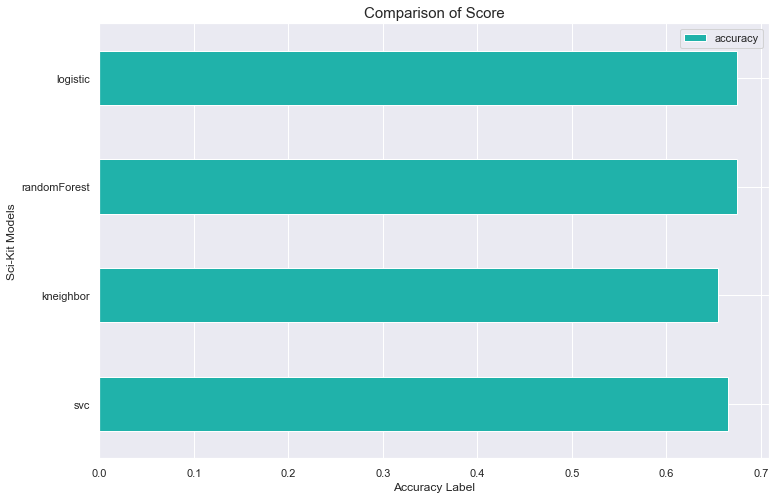

In [37]:
model_compare.T.plot(figsize=(12,8), kind='barh',color=['lightseagreen'])
plt.ylabel('Sci-Kit Models')
plt.xlabel('Accuracy Label')

plt.title('Comparison of Score',fontsize=15)
plt.xticks(rotation=0)

plt.show()

In [38]:
#### From this visualization we can see (RandomForestClassifier) and (Logistic Regression) will be good model for this data

# ROC CURVE and confusion matrix for logistic regression

In [39]:
from sklearn.metrics import confusion_matrix,plot_roc_curve

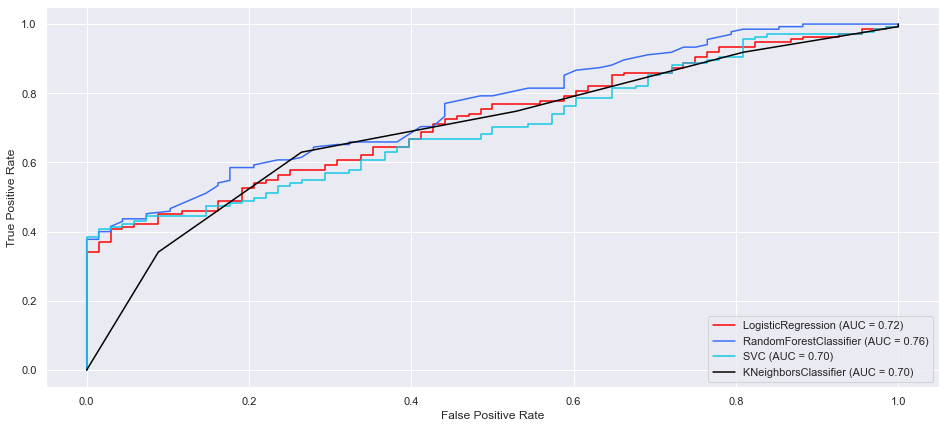

In [40]:
plt.figure(figsize=(16,7))
ax = plt.gca()

plot_roc_curve(logic_clf,x_test,y_test,ax=ax,c='red')
plot_roc_curve(forest_clf,x_test,y_test,ax=ax)
plot_roc_curve(svc_clf,x_test,y_test,ax=ax)
plot_roc_curve(KN_clf,x_test,y_test,ax=ax,c='black')

plt.show()


## TUNNING PARAMATER (HYPERPARAMETER TUNNING) with Cross Validation

#### RandomizedSearchCV

In [41]:
from sklearn.model_selection import RandomizedSearchCV

#### RandomForestClassifier with RandomizedSearchCV

In [42]:
#checking parameters
forest_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}

In [43]:
forest_random_param = {'n_estimators':np.arange(100,1000,100),
                      'max_depth':[None,3,5,10],
                      'min_samples_split':np.arange(2,10,2),
                      'min_samples_leaf':np.arange(1,20,2)}

In [44]:
#new clf with RandomizedSearchCV
forest_clf_randS = RandomizedSearchCV(forest_clf,cv=5,param_distributions=forest_random_param,verbose=True,n_iter=50)

#finding pattern with RandomizedSearchCV
forest_clf_randS.fit(x_test,y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=4),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   verbose=True)

In [45]:
forest_clf_randS.best_params_

{'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 5}

In [46]:
#getting the accuracy with new params
randCV_forest_accuracy = forest_clf_randS.score(x_test,y_test)
randCV_forest_accuracy

0.8325123152709359

#### LogisticRegression with RandomizedSearchCV

In [47]:
#checking params
logic_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 4,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [48]:
#parameter dict
logic_random_param = {'C': np.logspace(-4,4,80), 
                  'solver':['liblinear']}

In [49]:
#new clf for logic
logic_clf_randS = RandomizedSearchCV(logic_clf,cv=5,param_distributions=logic_random_param,verbose=True,n_iter=150)

#finding the pattern
logic_clf_randS.fit(x_test,y_test)

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 80 is smaller than n_iter=150. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    3.2s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=4),
                   n_iter=150,
                   param_distributions={'C': array([1.00000000e-04, 1.26260011e-04, 1.59415904e-04, 2.01278538e-04,
       2.54134304e-04, 3.20870000e-04, 4.05130497e-04, 5.11517810e-04,
       6.45842443e-04, 8.15440740e-04, 1.02957557e-03, 1.29994222e-03,
       1.64130720e-03, 2.07231465e-03, 2.61650470e-03, 3.30359912e-0...
       4.68690419e+01, 5.91768575e+01, 7.47167068e+01, 9.43373222e+01,
       1.19110313e+02, 1.50388695e+02, 1.89880782e+02, 2.39743497e+02,
       3.02700165e+02, 3.82189262e+02, 4.82552204e+02, 6.09270466e+02,
       7.69264957e+02, 9.71274020e+02, 1.22633068e+03, 1.54836526e+03,
       1.95496614e+03, 2.46834047e+03, 3.11652694e+03, 3.93492726e+03,
       4.96823959e+03, 6.27289986e+03, 7.92016405e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [50]:
#checking best Param
logic_clf_randS.best_params_

{'solver': 'liblinear', 'C': 0.35019004614317095}

In [51]:
#accuracy with best param
randCV_logic_accuracy = logic_clf_randS.score(x_test,y_test)
randCV_logic_accuracy

0.7438423645320197

### VISUALIZING THE RANDOMIZED SEARCH CV (RandomForestCLassifier and LogisticRegression)

In [52]:
randCV_accuracy_dict = {'Logistic':randCV_logic_accuracy,
                       'RandomForest':randCV_forest_accuracy}

In [53]:
randCV_accuracy_dict

{'Logistic': 0.7438423645320197, 'RandomForest': 0.8325123152709359}

In [54]:
randCV_accuracy_df = pd.DataFrame(randCV_accuracy_dict,index=['accuracy'])

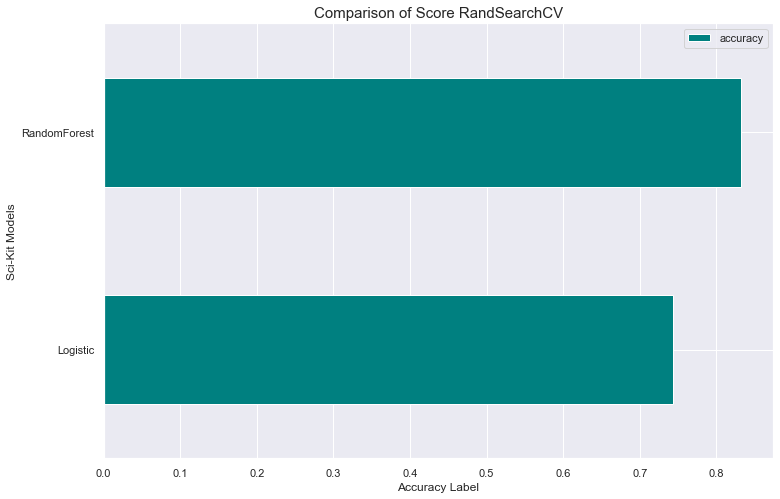

In [55]:
randCV_accuracy_df.T.plot(figsize=(12,8), kind='barh',color=['teal'])
plt.ylabel('Sci-Kit Models')
plt.xlabel('Accuracy Label')

plt.title('Comparison of Score RandSearchCV',fontsize=15)
plt.xticks(rotation=0)

plt.show()



In [56]:
#baseline and Randomized search CV
baseline_randomizeCV_dict = {'logic_baseline':logic_accuracy,
                            'logic_randCV':randCV_logic_accuracy,
                            'forest_baseline':forest_accuracy,
                            'forest_randCV':randCV_forest_accuracy}

In [57]:
baseline_randomizeCV_df = pd.DataFrame(baseline_randomizeCV_dict,index=['accuracy'])

baseline_randomizeCV_df = baseline_randomizeCV_df.T



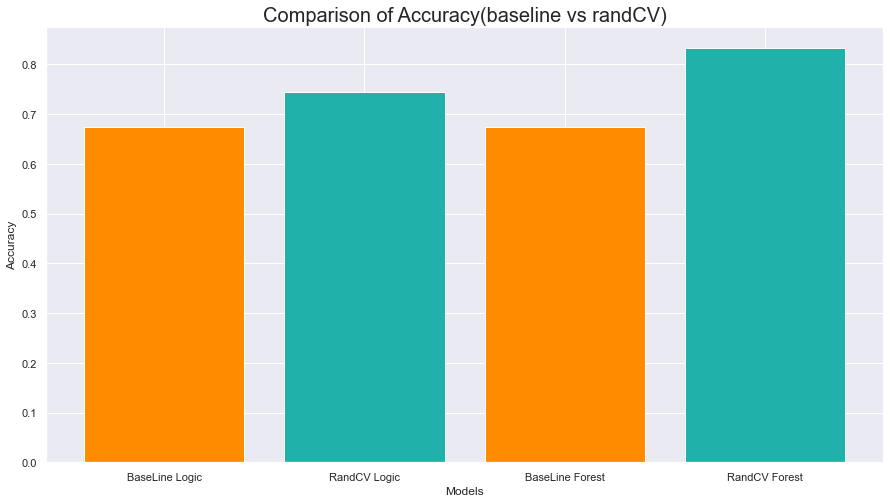

In [58]:
#Visualizing it
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(['BaseLine Logic','RandCV Logic','BaseLine Forest','RandCV Forest'],
       baseline_randomizeCV_df['accuracy'], color=['darkorange','lightseagreen','darkorange','lightseagreen'])

ax.set_title('Comparison of Accuracy(baseline vs randCV)',fontsize=20)
ax.set_ylabel('Accuracy',fontsize=12)
ax.set_xlabel('Models',fontsize=12)

plt.show()



# Checking ROC curve for Randomized SearchCV ( LOgistic Regression and RandomForest Regression)

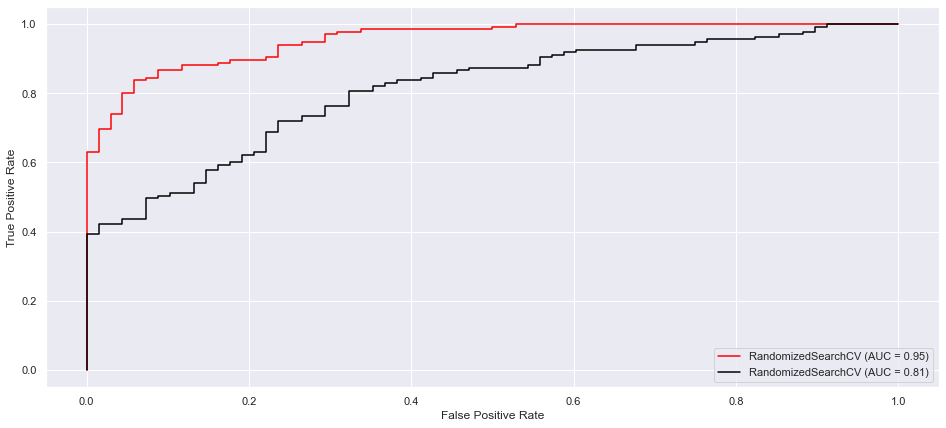

In [59]:
plt.figure(figsize=(16,7))
ax = plt.gca()

plot_roc_curve(forest_clf_randS,x_test,y_test,ax=ax,c='red')

plot_roc_curve(logic_clf_randS,x_test,y_test,ax=ax,c='black')

#plt.legend(['Random Forest','Logistic Regression'])

plt.show()

### We need to exhaustively search the pattern with Logistic Regression and RandomForestRegression for best result

# Improving Logistic Regression

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
logic_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 4,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [62]:
#creating params dictionary for GridSearchCV
logic_grid_params = {'C':np.logspace(-4,4,100),
                       'solver':['liblinear']}

## Different parameter we could try

# logic_grid_params2 = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
#                         'penalty' : ['l2'],
#                             'C' : [100, 10, 1.0, 0.1, 0.01]}

# penalty = ['l1', 'l2']
# C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
# solver = ['liblinear', 'saga']

# l_param_grid = dict(penalty=penalty,
#                   C=C,
#                   class_weight=class_weight,
#                   solver=solver)


In [63]:
#creating Grid CLF
logic_clf_grid = GridSearchCV(logic_clf,cv=5, param_grid=logic_grid_params,verbose=True)

#Finding the pattern
logic_clf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=4),
             param_grid={'C': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.3644894...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [64]:
#checking best params
logic_clf_grid.best_params_

{'C': 0.6280291441834259, 'solver': 'liblinear'}

In [65]:
#checking Grid Accuracy
logic_grid_score = logic_clf_grid.score(x_test,y_test)
logic_grid_score

0.6798029556650246

# Improving RandomForestClassifier

In [66]:
forest_grid_params = {'n_estimators':[100,200],
                  'min_samples_split':[4,6],
                  'min_samples_leaf':[1,4],
                  'max_features':['auto'],
                  'max_depth':[None,30]}

In [67]:
#creating grid clf for forest
forest_clf_grid = GridSearchCV(forest_clf,cv=5,verbose=True,param_grid=forest_grid_params)

#finding pattern
forest_clf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   21.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=4),
             param_grid={'max_depth': [None, 30], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 200]},
             verbose=True)

In [68]:
forest_clf_grid.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [69]:
forest_grid_score = forest_clf_grid.score(x_test,y_test)
forest_grid_score

0.6945812807881774

In [70]:
### IMPROVED GridSearchCV Result
grid_score_dict = {'Logic_Grid':logic_grid_score,
                  'Forest_Grid':forest_grid_score}

In [71]:
grid_score_df = pd.DataFrame(grid_score_dict,index=['accuracy'])



rand_vs_grid = grid_score_df.copy()

grid_score_df

,Logic_Grid,Forest_Grid
accuracy,0.679803,0.694581


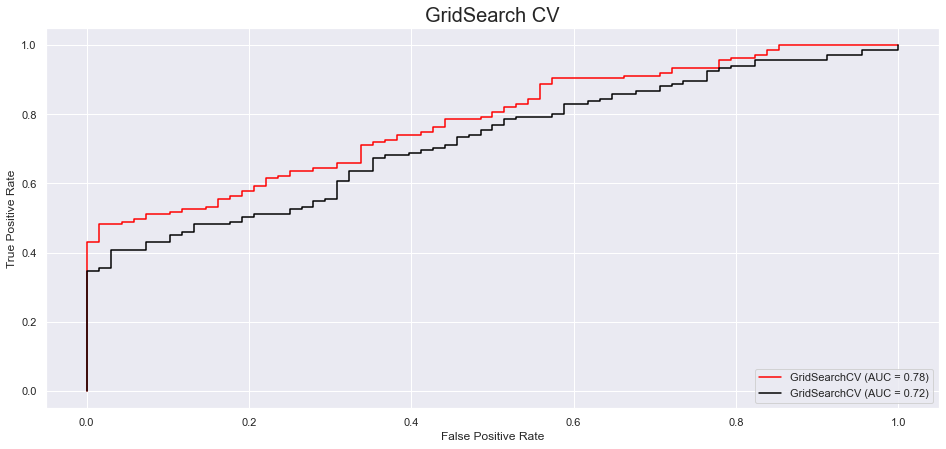

In [72]:
plt.figure(figsize=(16,7))
ax = plt.gca()

plot_roc_curve(forest_clf_grid,x_test,y_test,ax=ax,c='red')

plot_roc_curve(logic_clf_grid,x_test,y_test,ax=ax,c='black')

plt.title('GridSearch CV',fontsize=20)
#plt.legend(['Random Forest','Logistic Regression'])

plt.show()

# comparing the gridSearchCV vs the RandomizedSearchCV

In [73]:

rand_vs_grid[['Rand_logic','Rand_forest']] = [randCV_logic_accuracy,randCV_forest_accuracy]

In [74]:
rand_vs_grid

,Logic_Grid,Forest_Grid,Rand_logic,Rand_forest
accuracy,0.679803,0.694581,0.743842,0.832512


In [75]:
rand_vs_grid.columns

Index(['Logic_Grid', 'Forest_Grid', 'Rand_logic', 'Rand_forest'], dtype='object')

In [76]:
rand_vs_grid.columns = ['Logic_Grid','Rand_logic', 'Forest_Grid', 'Rand_forest']

In [77]:
rand_vs_grid
rand_vs_grid = rand_vs_grid.T
rand_vs_grid

,accuracy
Logic_Grid,0.679803
Rand_logic,0.694581
Forest_Grid,0.743842
Rand_forest,0.832512


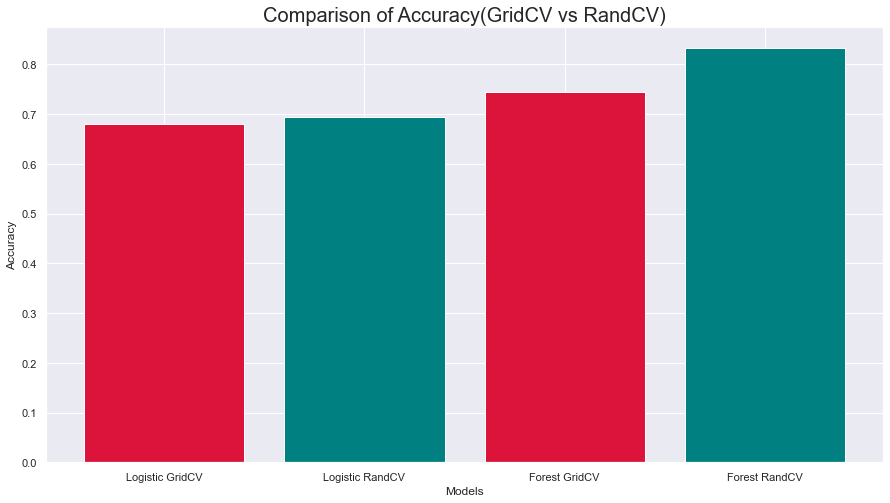

In [78]:
#Visualizing it
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(['Logistic GridCV','Logistic RandCV','Forest GridCV','Forest RandCV'],
       rand_vs_grid['accuracy'], color=['crimson','teal','crimson','teal'])

ax.set_title('Comparison of Accuracy(GridCV vs RandCV)',fontsize=20)
ax.set_ylabel('Accuracy',fontsize=12)
ax.set_xlabel('Models',fontsize=12)

plt.show()


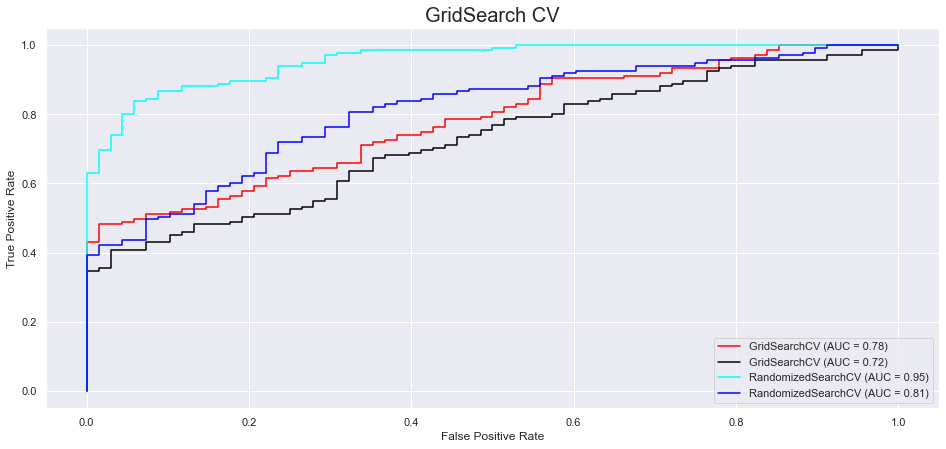

In [79]:
## Checking the ROC CURVE
plt.figure(figsize=(16,7))
ax = plt.gca()

plot_roc_curve(forest_clf_grid,x_test,y_test,ax=ax,c='red') # red meaning RandomForest with Grid Search CV

plot_roc_curve(logic_clf_grid,x_test,y_test,ax=ax,c='black') # Black meaning Logistic with Grid Search CV

plot_roc_curve(forest_clf_randS,x_test,y_test,ax=ax,c='cyan') # cyan meaning RandomForest with Random Search CV

plot_roc_curve(logic_clf_randS,x_test,y_test,ax=ax,c='blue')#blue meaning RandomForest with Random Search CV

plt.title('GridSearch CV',fontsize=20)
#plt.legend(['Random Forest','Logistic Regression'])

plt.show()

In [80]:
# we see RandomForestClassifier with RandomSearchCV showing the best results 

## Evalute the model with Confusion matrix, classification_report

In [81]:
#predicting the result
predict_result = forest_clf_randS.predict(x_test)

In [82]:
predict_result

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [83]:
np.array(y_test) #original test data

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0], dtype=int64)

In [84]:
predict_result == np.array(y_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [85]:
#checking with confusion matrix
confusion_matrix(y_test,predict_result)

array([[ 36,  32],
       [  2, 133]], dtype=int64)

In [86]:
#visualize it 
#visualize the confusion matrix with heatmap
def plot_confusion_matrix(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=True,cmap='summer',fmt='d')
    
    plt.xlabel('True Label')
    plt.ylabel('Predictable Label')
    
    plt.show()

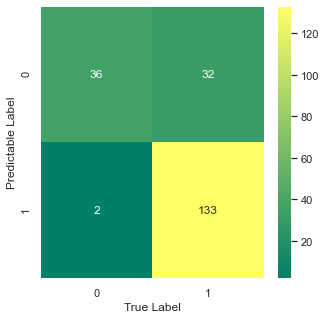

In [87]:
plot_confusion_matrix(y_test,predict_result)

* here the annot value = top_right, is false negative = model predict 0(negative) when the truth is 1 which means False negative predict
* here the annot value = bottom_left, is false positive = model predict 1(positive) when the truth is 0 which means False positive predict

In [88]:
#we can see from this heatmap. our predicted result fail to predict (22 + 4) value

In [89]:
from sklearn.metrics import classification_report,precision_score,f1_score,recall_score

In [90]:
#simple classification report #only on one simple test data not cross validated
print(classification_report(y_test,predict_result))

              precision    recall  f1-score   support

           0       0.95      0.53      0.68        68
           1       0.81      0.99      0.89       135

    accuracy                           0.83       203
   macro avg       0.88      0.76      0.78       203
weighted avg       0.85      0.83      0.82       203



In [91]:
from sklearn.model_selection import cross_val_score

In [92]:

def cv_metrics_report(model,x,y):
    accuracy = cross_val_score(model,x,y,cv=5,scoring='accuracy')
    precision = cross_val_score(model,x,y,cv=5,scoring='precision')
    recall = cross_val_score(model,x,y,cv=5,scoring='recall')
    f1 = cross_val_score(model,x,y,cv=5,scoring='f1')
    data_dict = { 'Accuracy': np.mean(accuracy),
                'Precision': np.mean(precision),
                'Recall': np.mean(recall),
                'f1':np.mean(f1)}
    
    
    return data_dict

In [93]:
forest_clf_randS.best_params_

{'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 5}

In [94]:
clf_best = RandomForestClassifier(n_estimators=300,min_samples_leaf=3,min_samples_split=6,max_depth=None)

In [95]:
cv_metrics_report(clf_best,featured_x,target_y)

{'Accuracy': 0.6176852167975417,
 'Precision': 0.6558408555970059,
 'Recall': 0.7600460642189406,
 'f1': 0.6995201841080689}

In [96]:
##
logic_clf_randS.best_params_

{'solver': 'liblinear', 'C': 0.35019004614317095}

In [97]:
clf_best_logic = LogisticRegression(solver ='liblinear', C=  0.7048574036451903)

In [98]:
cv_metrics_report(clf_best_logic,featured_x,target_y)

{'Accuracy': 0.59200604789543,
 'Precision': 0.6283922729013557,
 'Recall': 0.7682156889310392,
 'f1': 0.6900658667360682}

In [99]:
# we can see from the report RandomForestClassifier still showing better results than logistic Regression

## Saving the model

In [100]:
from joblib import dump,load
dump(forest_clf_randS,filename='rscv_random_forest.joblib')

['rscv_random_forest.joblib']

In [101]:
from joblib import dump,load
#### Loading the model
joblib_model = load(filename='rscv_random_forest.joblib')


In [102]:
## PREDICTING WITH THE MODEL

In [103]:
featured_x.iloc[:10]

,age,brush,tfb,bth,smoke in a day,drink alcohol,coffee,sweet,fastfood,binge eating,soft drinks-soda,open packets,chewing pen,nail biting,grinding teeth,betel leaf-nut,toothpick,chocolate,diabetes
0,21,4,2,0,3,0,1,0,1,1,1.0,0,0,0,0,1,1,1,0
1,22,4,1,0,4,1,1,1,1,0,2.0,1,0,1,0,0,0,1,0
2,23,4,2,1,2,1,1,0,1,1,3.0,1,0,1,0,0,1,1,1
3,23,4,2,1,4,1,1,0,1,1,1.0,0,0,1,0,0,0,1,0
4,19,4,1,1,6,1,0,0,1,1,3.0,0,0,0,1,0,1,0,0
5,24,4,2,0,5,0,1,1,1,0,1.0,1,0,1,0,0,0,1,0
6,24,4,3,1,6,0,1,1,1,0,1.0,0,0,0,0,0,0,1,0
7,26,4,1,1,3,0,1,1,1,0,1.0,1,1,1,0,0,1,1,0
8,24,4,1,0,1,1,1,0,1,1,3.0,1,0,0,0,0,0,1,0
9,23,4,2,0,0,0,1,1,1,0,1.0,1,0,1,0,0,0,1,0


In [104]:
pd.Series(joblib_model.predict(featured_x)).value_counts()

1    854
0    158
dtype: int64

In [105]:
target_y.value_counts()

1    608
0    404
Name: target, dtype: int64

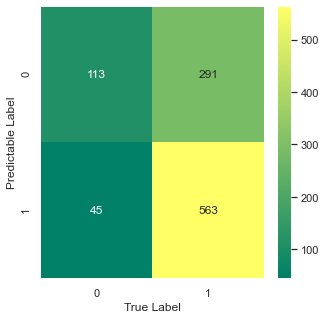

In [106]:
plot_confusion_matrix(target_y,joblib_model.predict(featured_x))

In [107]:
print(classification_report(target_y,joblib_model.predict(featured_x))) #without cross-Validation

              precision    recall  f1-score   support

           0       0.72      0.28      0.40       404
           1       0.66      0.93      0.77       608

    accuracy                           0.67      1012
   macro avg       0.69      0.60      0.59      1012
weighted avg       0.68      0.67      0.62      1012



In [108]:
cv_metrics_report(clf_best,featured_x,target_y) #with cross-validate

{'Accuracy': 0.6246256645368972,
 'Precision': 0.6522610835954165,
 'Recall': 0.7436255249966128,
 'f1': 0.7163590197701504}

In [109]:
randCV_forest_accuracy #working with only train data but with the classification report the model is not so good or not so bad

0.8325123152709359

In [110]:
#Most cases the model will predict 1 . 
#needed more data#
#or # the target column on the dataset filled by false result .

In [111]:
joblib_model.predict(featured_x[:5]) #predicted result

array([0, 1, 0, 1, 0], dtype=int64)

In [112]:
target_y[:5] #original data

0    0
1    0
2    1
3    1
4    1
Name: target, dtype: int64

In [115]:
featured_x[:5]

,age,brush,tfb,bth,smoke in a day,drink alcohol,coffee,sweet,fastfood,binge eating,soft drinks-soda,open packets,chewing pen,nail biting,grinding teeth,betel leaf-nut,toothpick,chocolate,diabetes
0,21,4,2,0,3,0,1,0,1,1,1.0,0,0,0,0,1,1,1,0
1,22,4,1,0,4,1,1,1,1,0,2.0,1,0,1,0,0,0,1,0
2,23,4,2,1,2,1,1,0,1,1,3.0,1,0,1,0,0,1,1,1
3,23,4,2,1,4,1,1,0,1,1,1.0,0,0,1,0,0,0,1,0
4,19,4,1,1,6,1,0,0,1,1,3.0,0,0,0,1,0,1,0,0


In [116]:
target_y[:5]

0    0
1    0
2    1
3    1
4    1
Name: target, dtype: int64

In [117]:
joblib_model.predict(featured_x[:5])

array([0, 1, 0, 1, 0], dtype=int64)